In [5]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [6]:
DATA_PATH = "/home/ubuntu/musikalkemist/test.json"

In [7]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()




Data succesfully loaded!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (N

2022-11-02 18:35:16.390234: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-02 18:35:16.390447: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 18:35:16.391218: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-02 18:35:16.492699: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-02 18:35:16.510980: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899960000 Hz


219/219 [==============================] - 3s 13ms/step - loss: 41.6624 - accuracy: 0.1327 - val_loss: 3.4690 - val_accuracy: 0.1394
Epoch 2/30
219/219 [==============================] - 2s 11ms/step - loss: 6.9499 - accuracy: 0.1333 - val_loss: 3.5067 - val_accuracy: 0.1044
Epoch 3/30
219/219 [==============================] - 2s 10ms/step - loss: 4.6374 - accuracy: 0.1067 - val_loss: 3.5161 - val_accuracy: 0.0997
Epoch 4/30
219/219 [==============================] - 2s 10ms/step - loss: 3.9461 - accuracy: 0.1181 - val_loss: 3.5137 - val_accuracy: 0.0987
Epoch 5/30
219/219 [==============================] - 2s 10ms/step - loss: 3.7493 - accuracy: 0.1041 - val_loss: 3.5108 - val_accuracy: 0.0987
Epoch 6/30
219/219 [==============================] - 3s 12ms/step - loss: 3.6518 - accuracy: 0.1134 - val_loss: 3.5066 - val_accuracy: 0.0987
Epoch 7/30
219/219 [==============================] - 2s 10ms/step - loss: 3.6008 - accuracy: 0.1129 - val_loss: 3.5016 - val_accuracy: 0.0997
Epoch 8/3

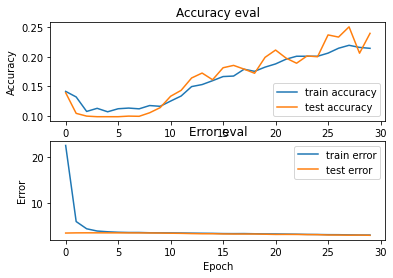

94/94 - 0s - loss: 2.9733 - accuracy: 0.2401

Test accuracy: 0.24008002877235413


In [8]:
if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=30)

    # plot accuracy and error as a function of the epochs
    plot_history(history)
    
    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)




